## CLONING

In [7]:
#!git clone https://github.com/ultralytics/yolov5

In [4]:
!cd yolov5 & pip install -r requirements.txt

    extract-msg (<=0.29.*)
                 ~~~~~~~^

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [9]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Natha/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-7-6 Python-3.11.7 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 15.9MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [10]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [13]:
%matplotlib inline 


# REAL TIME COCO DATASET DETECTION USING PRETRAINED MODEL

In [14]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [15]:
import uuid   # Unique identifier
import os
import time

In [16]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']

In [17]:
#!git clone https://github.com/HumanSignal/labelImg

In [18]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

    extract-msg (<=0.29.*)
                 ~~~~~~~^

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\Natha\Downloads\drowsiness': No such file or directory
YOLOv5  2024-7-8 Python-3.11.7 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0

In [36]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Natha/.cache\torch\hub\master.zip
YOLOv5  2024-7-8 Python-3.11.7 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)

Fusing layers... 
Model summary: 157 layers, 7058671 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [24]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

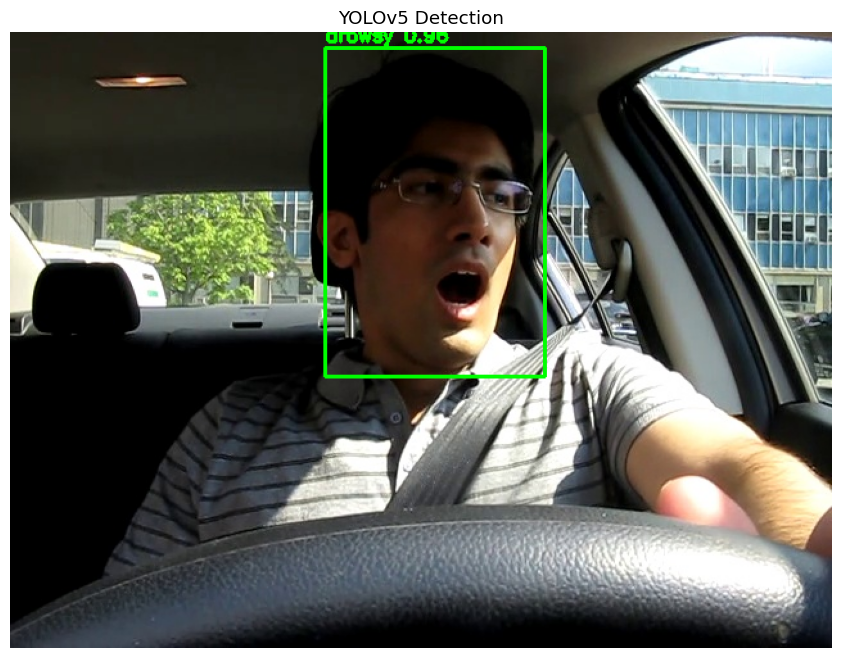

In [37]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image from the specified path
image_path = r'C:\Users\Natha\Downloads\drowsiness detection system\dataset_new\test\yawn\61.jpg'
image = cv2.imread(image_path)

# Ensure image is in RGB format (OpenCV loads images as BGR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Make detections
results = model(image_rgb)

# Parse detection results
pred = results.pred[0]  # Get predictions from the first image in batch (assuming single image)

# Create a copy of the original image to preserve original colors
image_with_detections = image.copy()

# Draw boxes and labels on the copied image
for det in pred:
    xmin, ymin, xmax, ymax = map(int, det[:4])
    label = int(det[5])
    score = det[4].item()  # Convert tensor to Python float
    
    # Draw bounding box and label on the copied image
    cv2.rectangle(image_with_detections, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
    cv2.putText(image_with_detections, f'{model.names[label]} {score:.2f}', (xmin, ymin - 5),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Convert the modified image to PIL format for displaying in Jupyter Notebook
image_pil = Image.fromarray(cv2.cvtColor(image_with_detections, cv2.COLOR_BGR2RGB))

# Display the image with detections in Jupyter Notebook
plt.figure(figsize=(12, 8))
plt.imshow(image_pil)
plt.axis('off')  # Hide axis
plt.title('YOLOv5 Detection')
plt.show()


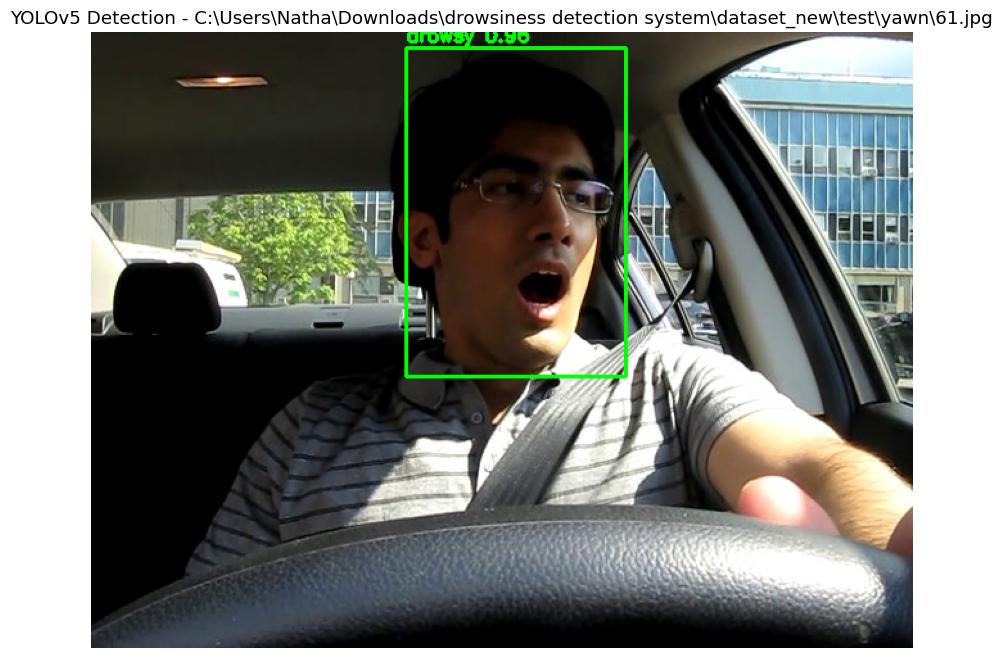

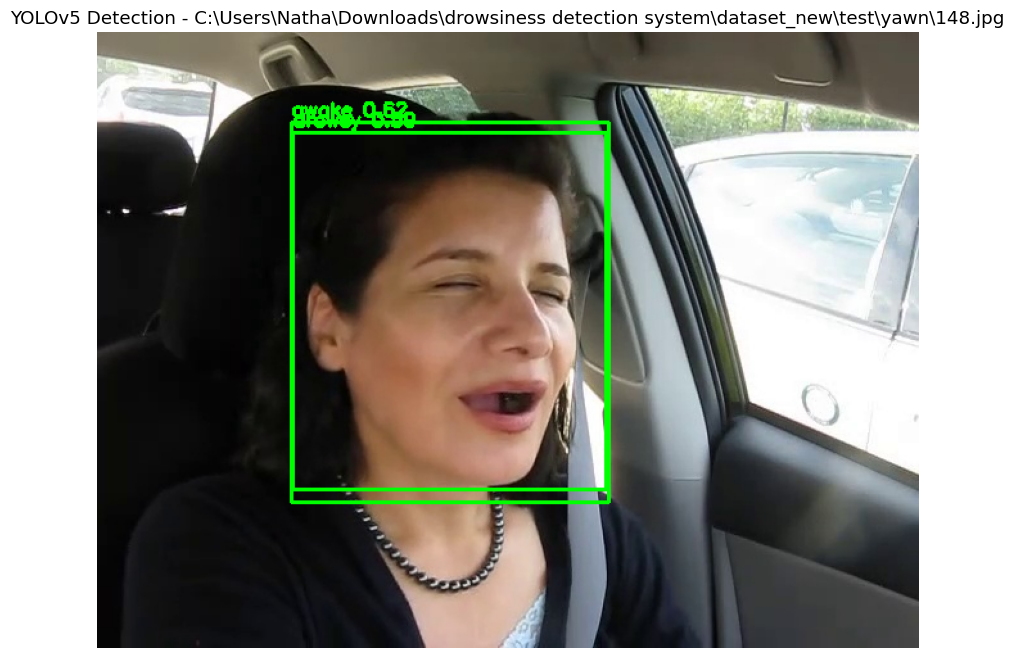

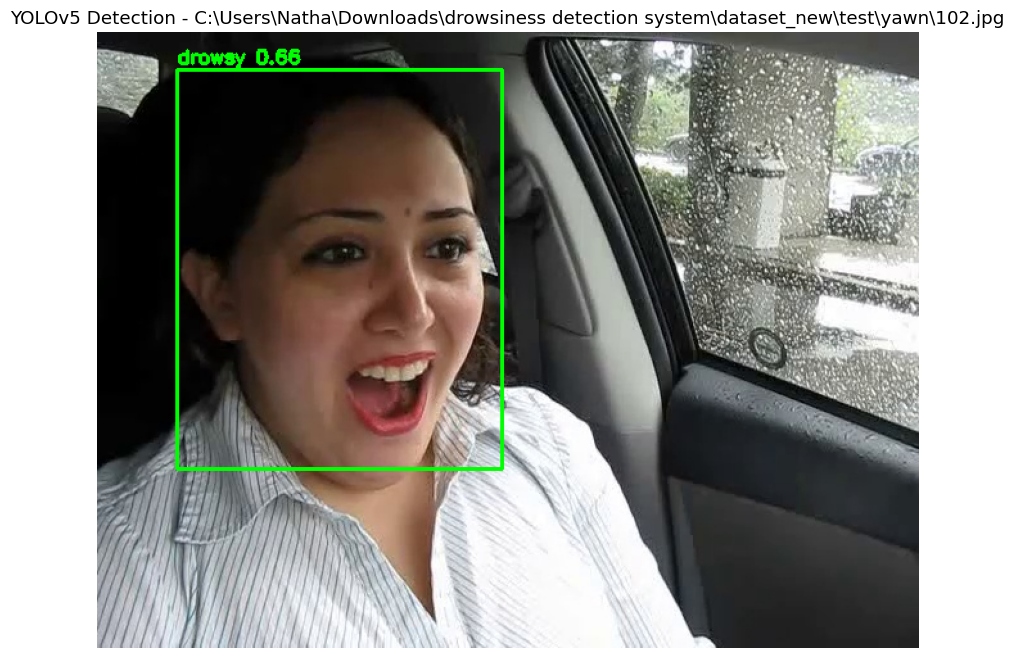

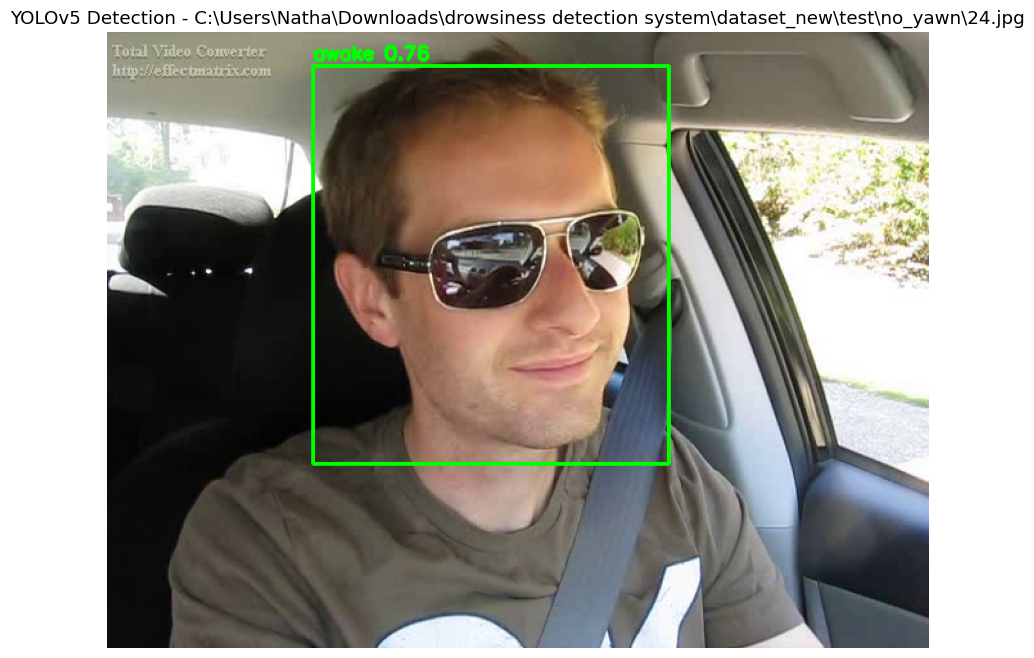

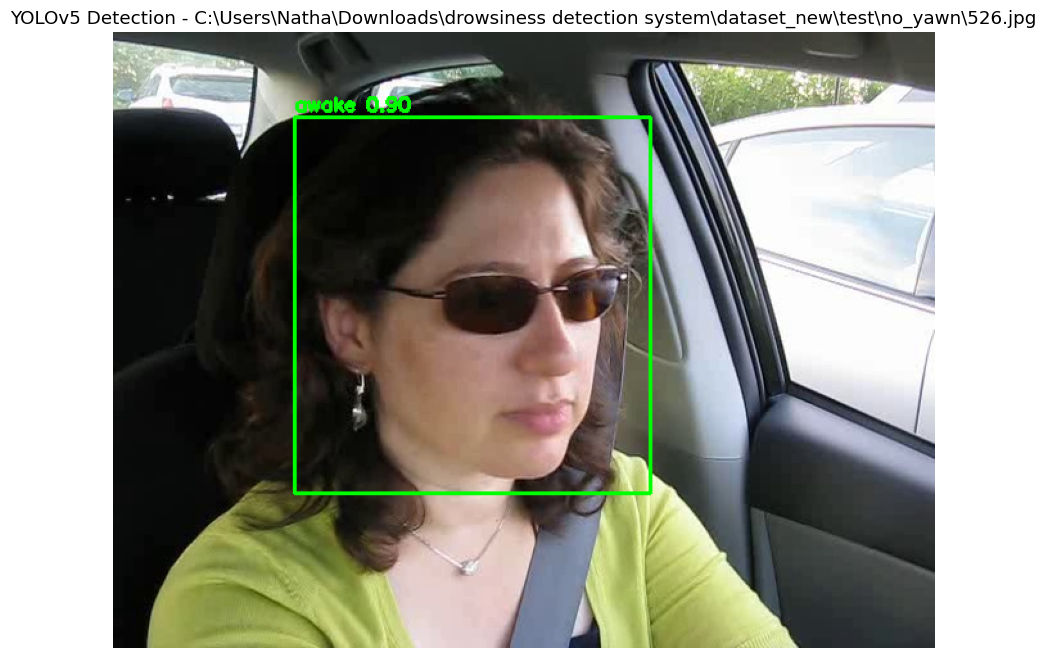

In [42]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def detect_and_display(images):
    for image_path in images:
        # Load the image from the specified path
        image = cv2.imread(image_path)

        # Ensure image is in RGB format (OpenCV loads images as BGR)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Make detections
        results = model(image_rgb)

        # Parse detection results
        pred = results.pred[0]  # Get predictions from the first image in batch (assuming single image)

        # Create a copy of the original image to preserve original colors
        image_with_detections = image.copy()

        # Draw boxes and labels on the copied image
        for det in pred:
            xmin, ymin, xmax, ymax = map(int, det[:4])
            label = int(det[5])
            score = det[4].item()  # Convert tensor to Python float
            
            # Draw bounding box and label on the copied image
            cv2.rectangle(image_with_detections, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
            cv2.putText(image_with_detections, f'{model.names[label]} {score:.2f}', (xmin, ymin - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Convert the modified image to PIL format for displaying in Jupyter Notebook
        image_pil = Image.fromarray(cv2.cvtColor(image_with_detections, cv2.COLOR_BGR2RGB))

        # Display the image with detections in Jupyter Notebook
        plt.figure(figsize=(12, 8))
        plt.imshow(image_pil)
        plt.axis('off')  # Hide axis
        plt.title(f'YOLOv5 Detection - {image_path}')
        plt.show()

# List of image paths
image_paths = [
    r'C:\Users\Natha\Downloads\drowsiness detection system\dataset_new\test\yawn\61.jpg',
    r'C:\Users\Natha\Downloads\drowsiness detection system\dataset_new\test\yawn\148.jpg',
    r'C:\Users\Natha\Downloads\drowsiness detection system\dataset_new\test\yawn\102.jpg',
    r'C:\Users\Natha\Downloads\drowsiness detection system\dataset_new\test\no_yawn\24.jpg',
    r'C:\Users\Natha\Downloads\drowsiness detection system\dataset_new\test\no_yawn\526.jpg'
    # Add more image paths here as needed
]

# Call the detection function with the list of images
detect_and_display(image_paths)
